# Exploratory data analysis

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
    
    

In [123]:
train = pd.read_csv('titanic_train.csv')

In [124]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [125]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


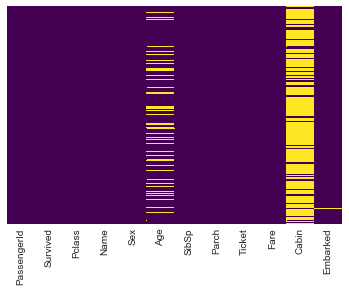

In [126]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap='viridis' )
# that yello thing is missing values

In [127]:
sns.set_style('whitegrid')

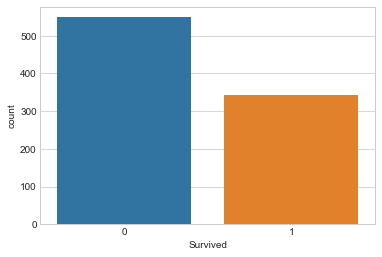

In [128]:
sns.countplot(x='Survived', data=train)

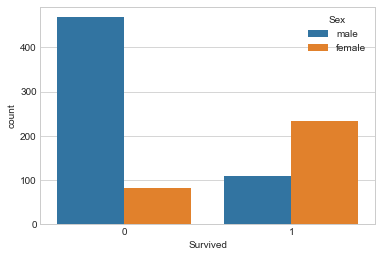

In [129]:
sns.countplot(x='Survived',hue='Sex', data=train)

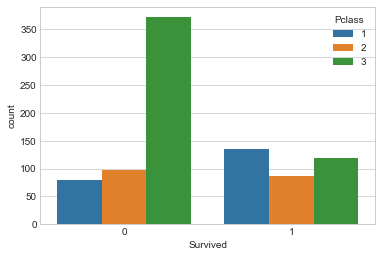

In [130]:
sns.countplot(x='Survived',hue='Pclass', data=train)

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



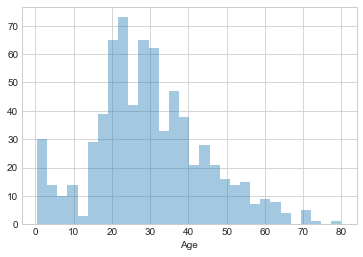

In [131]:
sns.distplot(train['Age'].dropna(), kde=False, bins=30)

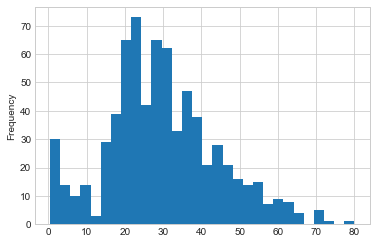

In [132]:
train['Age'].plot('hist', bins=30)

In [133]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


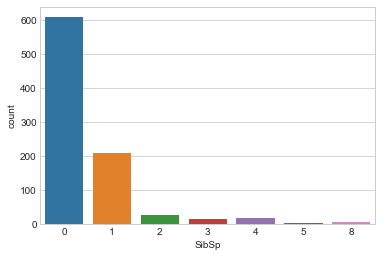

In [134]:
sns.countplot(x='SibSp', data=train)

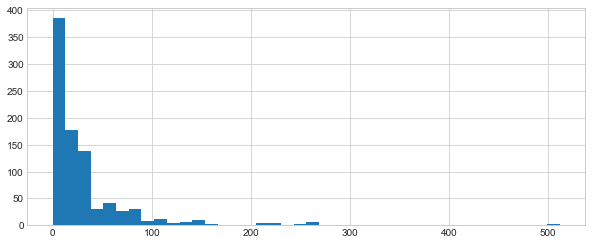

In [135]:
train['Fare'].hist(bins=40, figsize=(10, 4))

In [136]:
# import cufflinks as cf
# cf.go_offline()
# train['Fare'].iplot(kind='hist', bins=50)

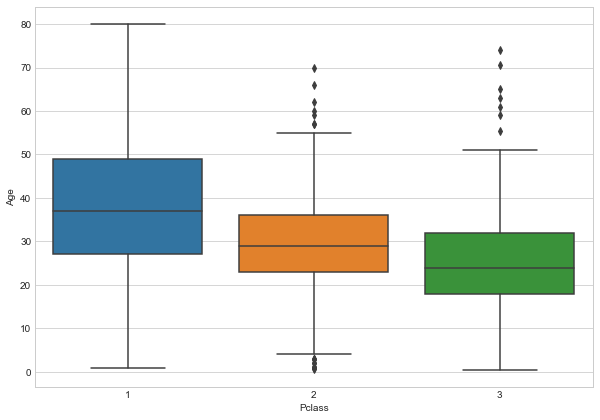

In [137]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=train)

In [138]:
def impute_age(cols):
    Age = cols[0]
    Pclass  = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age
    

In [139]:
train['Age' ]= train[['Age', 'Pclass']].apply(impute_age, axis=1)

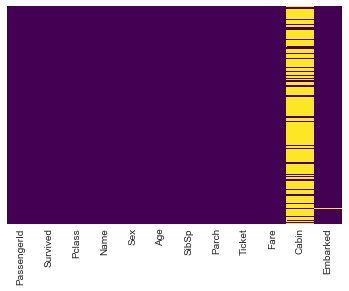

In [140]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [141]:
train.drop('Cabin', axis=1, inplace=True)

In [142]:
train.dropna(inplace=True)

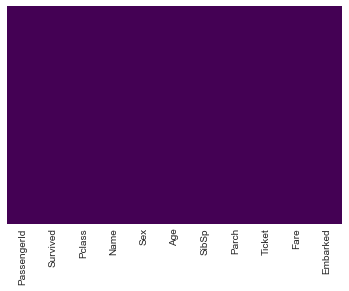

In [143]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

# Converting to categorical features
**Creating a dummy vaiable **

In [144]:
sex = pd.get_dummies(train['Sex'], drop_first=True)# weather or not this person is a male 

In [145]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [146]:
train = pd.concat ([train, sex, embark], axis=1)

In [147]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,Q,1,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,1,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,1,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,0,0,0


In [148]:
train.drop(['Sex', 'Embarked', 'Name'], axis=1, inplace=True)

In [149]:
train.drop('Ticket', axis=1, inplace=True)

In [154]:
train.drop('PassengerId',axis=1, inplace=True)

In [155]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [156]:
train.to_csv('train_cleaned.csv')

# Now time to apply Logistic Regression using python


** Gonna tell us weather or not a Passenger survived on titanic by examine the features of them**

In [157]:
x = train.drop('Survived', axis=1)
y = train['Survived']

In [158]:
from sklearn.cross_validation import train_test_split

In [159]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=101)

In [162]:
from sklearn.linear_model import LogisticRegression

In [163]:
logmodel = LogisticRegression()


In [164]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [168]:
predictions=logmodel.predict(X_test)

In [171]:
pd.DataFrame(predictions)

,0
0,0
1,0
2,1
3,1
4,0
5,0
6,0
7,0
8,0
9,1


In [173]:
from sklearn.metrics import classification_report

In [175]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.80      0.91      0.85       163
          1       0.82      0.65      0.73       104

avg / total       0.81      0.81      0.80       267



In [177]:
from sklearn.metrics import confusion_matrix

In [179]:
confusion_matrix(y_test, predictions)

array([[148,  15],
       [ 36,  68]], dtype=int64)